# SunPy: coding to analyse signals from the Sun

The SunPy library provides various modules for the conversion and transformation of electromagnetic signals emitted from the Sun. It is widely used among astrophysical research communities. However, it is also a valuable tool to experiment with high-volume data. In this walkthrough, I will demonstrate some common ways to explore these solar data resources.

Audience *
Python programmers, data engineers, astrophysicists

Outcomes *
Following this walkthrough, you can start delving into a wealth of solar online data repositories and created new output for either research work or your curiosity. 

Accessibility *
The material would be readily accessible by anyone who has a PC with Python installed.

Promotion *
A digital badge for the first attendee to complete the walkthrough

Technological Requirements *
No specific requirements. Attendees can experiment with their own PC.

## Short description

SunPy is a community-developed free and open-source software package for solar physics. SunPy is meant to be a free alternative to [SolarSoft](https://www.lmsal.com/solarsoft/) and its aim is to provide the software tools necessary so that anyone can analyze solar data. 

## Software development progress
Previous versions of SunPy:
* 0.1 in 2011
* 0.5 in 2015 (~ 20k lines of code)
* 1.0 in 2019 (~ 30k lines of code, porting to Python 3.0)

## Typical uses


* Query and download data from many different solar missions and instruments via a general, standard, and consistent interface.
* Load and visualize time series data — measurements of how, say, a particular type of flux from a region changes over time — and images.
* Perform transformations between the variety of coordinate systems commonly used to describe events and features both on the Sun and within the heliosphere.


A survey carried out by Bobra et al. (2020) reveals that Python and IDL are two main programming tools used in astronomy and astrophysics researchers, with the trend of "younger" respondents tend to use more Python.
![SunPy_survey_IDL_vs_Python.webp](SunPy_survey_IDL_vs_Python.webp)

## 1. Reading and displaying maps of the Sun

This [example](https://docs.sunpy.org/en/stable/generated/gallery/plotting/finding_local_peaks_in_solar_data.html#sphx-glr-generated-gallery-plotting-finding-local-peaks-in-solar-data-py) shows how to download and display a map for a sample AIA image data. [AIA](https://aia.lmsal.com/) (The Atmospheric Imaging Assembly) provides imaging of the solar atmosphere in multiple wavelengths to link changes in the surface to interior changes. Data includes images of the Sun in 10 wavelengths every 10 seconds.

The first time you run the code block, it could take a long time and not all files may be downloaded. Once you have imported `AIA_193_IMAGE`, you can rerun the code without having to wait!

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE
from sunpy.map.maputils import all_pixel_indices_from_map

aiamap = sunpy.map.Map(AIA_193_IMAGE)

Here is the map of the sun:

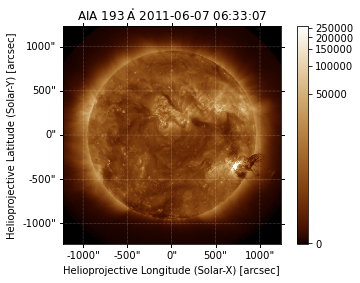

In [6]:
plt.figure()
aiamap.plot()
plt.colorbar()

Next, we will [find local peaks](https://docs.sunpy.org/en/stable/generated/gallery/plotting/finding_local_peaks_in_solar_data.html#sphx-glr-generated-gallery-plotting-finding-local-peaks-in-solar-data-py) in this dataset.

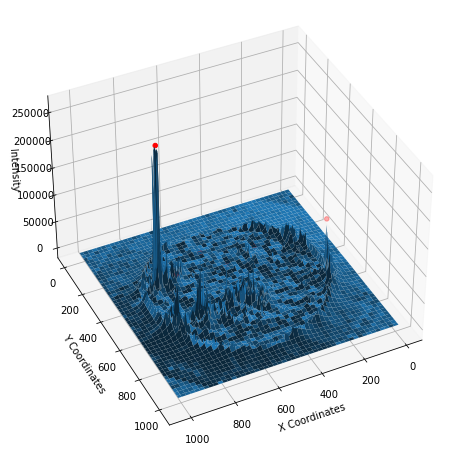

In [8]:
from skimage.feature import peak_local_max

X, Y = all_pixel_indices_from_map(aiamap)
coordinates = peak_local_max(aiamap.data, min_distance=60, threshold_rel=0.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, aiamap.data)
ax.view_init(elev=39, azim=64)
peaks_pos = aiamap.data[coordinates[:, 0], coordinates[:, 1]]
ax.scatter(coordinates[:, 1], coordinates[:, 0], peaks_pos, color='r')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
_ = ax.set_zlabel('Intensity')

## 1b. Displaying maps for local files

Data files may pre-exist in your local drive. If so, you can directly showing maps without downloading. We already have the file `20170707_000815_n4c2A.fts.gz`  in the `SECCHI` subfolder. This is a SECCHI file obtained with [LASCO](https://lasco-www.nrl.navy.mil/) instrument.

## References


Bobra, M.G., Mumford, S.J., Hewett, R.J. et al. (2020). A Survey of Computational Tools in Solar Physics. Sol Phys 295, 57. https://doi.org/10.1007/s11207-020-01622-2

The SunPy Community et al. (2020). “The SunPy Project: Open Source Development and Status of the Version 1.0 Core Package,” ApJ 890 68. doi:10.3847/1538-4357/ab4f7a

The SunPy Community (2021). SunPy 3.0.1 Documentation. https://docs.sunpy.org/en/stable/index.html

![Aberystwyth University](aber-logo.svg)

Nguyen Quang Chien 

Department of Physics

Currently working for the [Solar Research Group](https://solarphysics.aber.ac.uk/)